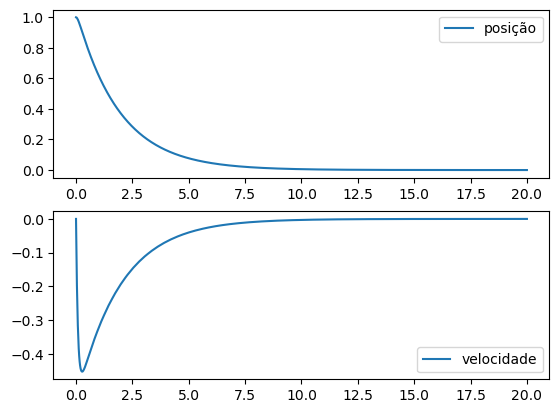

In [ ]:
'''
Define a equação do oscilador harmônico e um array com os tempos para
serem utilizados nos parâmetros da função solve_ivp.

O solve_ivp retorna um array com os tempos requisitados, outro com valores
da posição, e um último com os valores da velocidade. Para acessar separadamente os 
arrays, utiliza-se .t(array com tempos), .y(array com os valores do vetor, tanto posição quanto velocidade).
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

y0 = np.array([1, 0])

def oh(t, y, w, b):
  f = np.array([y[1], - w*y[0] - b*y[1]])
  return f

tempo = np.linspace(0, 20, 1000)
Y = solve_ivp(oh, [0, tempo[-1]], y0, t_eval=tempo, args=(2*np.pi, 4*np.pi)) # para plotar o amortecimento crítico, b = 4*pi

plt.subplot(211)
plt.plot(Y.t, Y.y[0], label='posição')
plt.legend()

plt.subplot(212)
plt.plot(Y.t, Y.y[1], label='velocidade')
plt.legend()

plt.show()

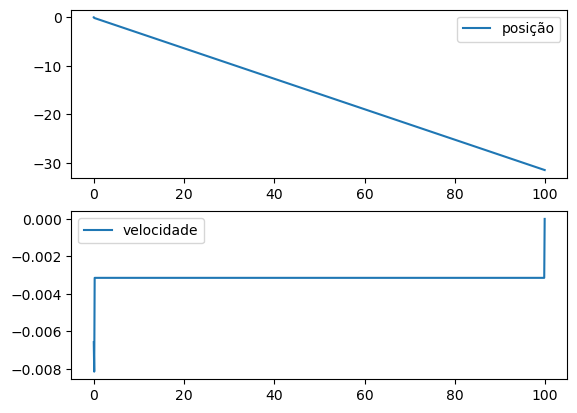

In [24]:
'''
Método de Verlet
'''
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros(1000)
v = np.zeros(1000)
v[0] = 1
t = np.zeros(1000)
dt = 0.1
y = np.array([1, 0])

def a(y, w, b):
  a = (- w*y[0] - b*y[1])
  return a

for i in range (0, len(x) - 1):
    x[i+1] = x[i] - v[i] * dt + (a(y, 2*np.pi, 1) * (dt**2) * 0.5)
    v[i] = (x[i+1] - x[i-1]) * 0.5 * dt
    t[i+1] = t[i] + dt

plt.subplot(211)
plt.plot(t, x, label='posição')
plt.legend()

plt.subplot(212)
plt.plot(t, v, label='velocidade')
plt.legend()

plt.show()